## FETCH ROBOT



1. Descargar el archivo Fetch.zip
2. Copiarlo al src del work space
3. Abrir la terminal

con el comando rosdep garantizamos que todas las dependencias están instaladas.
```
rosdep install --from-paths src --ignore-src -r -y
```
4. Compilamos.

Empezar la simulacion

```
roslaunch fetch_gazebo simulation.launch
```

Revisamos todos los topicos que incluyen para el control del robot

```
rostopic list
rostopic info /base_controller/command
rosmsg info geometry_msgs/Twist
```

Movemos el robot
```
rostopic pub /base_controller/command geometry_msgs/Twist "linear:
  x: 0.2
  y: 0.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: 0.0" -r3
```

Creamos el  paquete para el control  y compilamos

```
catkin_create_pkg package_fetch roscpp rospy sensor_msgs control_msgs geometry_msgs trajectory_msgs actionlib actionlib_msgs
```


## Robot Movil

```
#!/usr/bin/env python3                         
# encoding: utf-8

import rospy                                  
from geometry_msgs.msg import Twist           #Importamos el tipo de mensaje Twist                                                          


def nodo():                                   #Definimos una función nodo                                   
    
    rospy.init_node('nodo_movimiento_base')         #Inicializamos nuestro nodo y le asignamos un nombre = nodo_movimiento_base
           
                                                # Name Topic   |tipo de mensaje|límite de 10 mensajes en cola
    velocity_publisher = rospy.Publisher('/base_controller/command',Twist, queue_size=10)

    # creamos un arreglo de mensajes tipo Twist (Para generar una trayectoria)
    vel_robot = []
    vel_referencia_x = [0.1,0.3,0.5,0.8]
    vel_referencia_y = [0.1,0.3,0.5,0.8]
    vel_referencia_w = [0.0,0.0,0.5,0.0]    
    for i in range(len(vel_referencia_x)):
        vel_msg = Twist()
        vel_msg.linear.x = vel_referencia_x[i]   #Asignamos una velocidad lineal a la componenete en X
        vel_msg.linear.y = vel_referencia_y[i]    #Asignamos una velocidad lineal a la componenete en Y
        vel_msg.angular.z = vel_referencia_w[i]   #Asignamos una velocidad angular en Z
        vel_robot.append(vel_msg)

    rate = rospy.Rate(10)     #Crea un objeto Rate a 10hz
    i = 0
    while not rospy.is_shutdown():              #Bucle While
        if(i > len(vel_referencia_x)-1):
             i = 0
        velocity_publisher.publish(vel_robot[i])     #publicamos nuestro mensaje vel_robot para mover la base del robot                                                
        i = i+1
        rate.sleep()                            #Loop 10 times per second           

if __name__ == '__main__':                                  
    try:
        nodo()                                 # Lamamos a la función nodo
    except rospy.ROSInterruptException :       # Check si hay una excepción  Ctrl-C para terminar la ejecución del nodo
            pass
  ```

Trayectoria

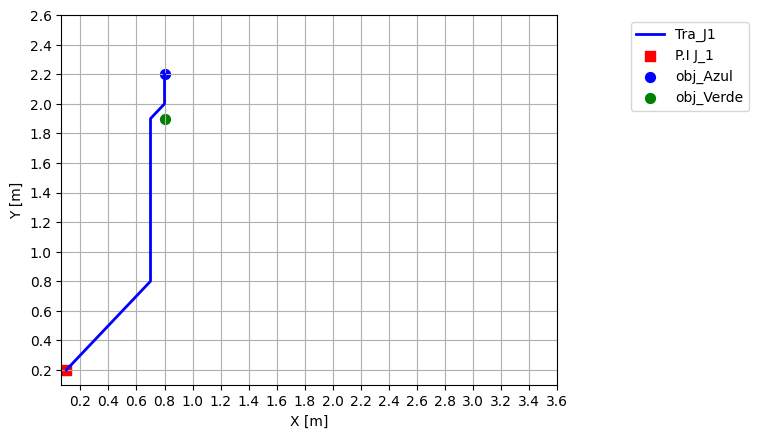

In [1]:
import numpy as np
import matplotlib.pyplot as plt


trayectoria_X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8]
trayectoria_Y = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2]

fig = plt.figure()
plt.plot(trayectoria_X,trayectoria_Y,'b',linewidth = 2, label='Tra_J1')
plt.scatter(trayectoria_X[0], trayectoria_Y[0], color='r', marker = "s", s=50, label='P.I J_1')


plt.scatter(0.8, 2.2, color='b', s=50, label='obj_Azul')
plt.scatter(0.8, 1.9, color='g', s=50, label='obj_Verde')

# Colocar la leyenda fuera del cuadro (coordenadas [1.1, 1])
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')


# Colocar la leyenda fuera del cuadro (coordenadas [1.1, 1])
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xticks([0.2, 0.4, 0.6, 0.8, 1.0,1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6])
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0,1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6])
plt.grid()
plt.show()

Velocidades

In [ ]:
import math
uref = [1.2809402194520938, 1.130051800961101, 1.1187385944497548, 1.3024596565684965, 1.123665876237911, 0.5122361596070966, 1.1647925007589741, 1.170773991466074, 1.1948257086381353, 1.208368830398742, 1.218899430431996, 1.226570974944588, 1.1694135295571293, 1.189500574354976, 0.8415973435020999, 0.995202877563696, 0.7260845377589021, 1.2327952439429357, 0.9282136862600318, 0.7068572777332995, 0.540310287197888, 0.412542802657457, 0.314886045276194, 0.2399815037210589, 0.18238674556089093, 0.14045148198553348, 0.10575270984544567, 0.07896883992114477, 0.05829250523835635, 0.042335498835801205, 0.03259916928879529, 0.022636750678410294, 0.014935068876944313, 0.008982996622014815, 0.0043848875073290855, 0.0033700133321142686, 5.2864534367737045e-05, -0.0025073139938759257, -0.004482146206412593, -0.006004550991578855, -0.004603360118137177, -0.0061009290554020525, -0.007253903820525967, -0.008140984681614621, -0.008823011680107972, -0.0067459625341112425, -0.007755424536151325, -0.00853047502964435, -0.009125110515405965, -0.009580968670789189, -0.007305113174684464, -0.008191028294736113, -0.00886928898571531, -0.009388157551793978, -0.00978474925455343, -0.007439217067154231, -0.00830030466427538, -0.008957637342721845, -0.009459002673170897, -0.0098410483234554, -0.0074602094645257995, -0.10826264091568284, -0.08460159857566227, -0.06657593797809529, -0.052863102665499796, -0.03989537081861478, -0.03262940781970417, -0.02711830092753028, -0.02294233903796511, -0.01978091771777844, -0.014872498357389073, -0.01368993551099606, -0.012795891404241293, -0.012120319446502685, -0.011610004850937152, -0.008700198217612625, -0.009038855079989876, -0.00929287485127146, -0.009482950295681898, -0.009624710824355771, -0.007188993981020237, -0.00790632775441589, -0.008443300719737538, -0.008844471448264887, -0.009143404411414771, -0.006806951587958978, -0.0079468314132128, -0.00872703898823548, -0.009227731061196535, -0.00950778422340042, -0.007053751830714684, -0.007840552448005, -0.008427079089557777, -0.00886396138716415, -0.009189107973012213, -0.006793795400634564, -0.0076556502998006105, -0.008295940225002987, -0.008771237278007217, -0.009123757402993364]
wref = [-0.12818586791055542, 0.226153911971269, 0.06257160548292795, -0.3080461996147781, 0.23649468500503446, 3.6257909071421137, 0.8892610806929886, 0.8136916518052122, 0.5819564796248047, 0.4504811128840901, 0.33969144113574656, 0.257580215877354, 0.18036404013338755, 0.15207350844062728, -3.0454405927175205, -0.8670797240902485, 3.584312129938684, -0.04529575087144927, 0.1829886881884481, 0.08880905774419001, 0.06715244147302069, 0.04834329870720483, 0.035262739010037236, 0.025909253911389776, 0.019125945869811815, 0.014421822076547302, 0.010638244531595517, 0.007832829060167117, 0.005724018082567364, 0.0041276251570601784, 0.0031688127063014145, 0.0021875800444811195, 0.0014393111935799001, 0.0008645575504625895, 0.00042165312996000654, 0.0003252662685658813, 4.6328421663134215e-06, -0.00024269654002013113, -0.00043416763810056333, -0.0005826821670634586, -0.0004480493545096224, -0.0005940512262503204, -0.0007077852218183944, -0.0007963394657905244, -0.0008654080227018719, -0.0006641758571512694, -0.0007640598331446182, -0.000842412993059322, -0.0009036264638865655, -0.0009515348084250792, -0.0007283794432007346, -0.0008172761587987354, -0.0008871237420075286, -0.0009416801937893028, -0.000984371342004099, -0.000751410124709494, -0.0008389504288191784, -0.0009076383206223834, -0.0009611727770300365, -0.0010029751311092965, -0.0007633986473392726, -0.011063132125561998, -0.00921816129335936, -0.007440606323386939, -0.0059932299958281076, -0.0045755668992399695, -0.00376295817674656, -0.00314646767272361, -0.00267675768540153, -0.0023193877163789943, -0.0017537429249724395, -0.0016168006904923417, -0.0015160667345556025, -0.0014408513080459587, -0.0013847373511795067, -0.0010420969328124481, -0.0010834028870735366, -0.001116676830842054, -0.0011427209777431296, -0.0011631351317265496, -0.0008721519941894006, -0.0009596263224652549, -0.0010272379645867526, -0.0010789224309642367, -0.0011184730740975138, -0.0008358215628010877, -0.000976088393919907, -0.0010746588179546108, -0.001139580137548055, -0.0011776267614428406, -0.000877119826119583, -0.0009753245703642586, -0.0010508096404331932, -0.001108261886875114, -0.0011521139068136768, -0.00085507293409911, -0.0009638375153381416, -0.001046950549577237, -0.0011098946396559531, -0.0011577011536054813]
tetha = [0.7853981633974483, 0.7725795766063928, 0.7951949678035196, 0.8014521283518125, 0.7706475083903347, 0.7942969768908381, 1.1568760676050496, 1.2458021756743485, 1.3271713408548698, 1.3853669888173503, 1.4304151001057592, 1.464384244219334, 1.4901422658070693, 1.508178669820408, 1.5233860206644707, 1.2188419613927186, 1.1321339889836937, 1.4905652019775621, 1.4860356268904171, 1.504334495709262, 1.513215401483681, 1.519930645630983, 1.5247649755017034, 1.5282912494027072, 1.5308821747938461, 1.5327947693808273, 1.534236951588482, 1.5353007760416415, 1.5360840589476583, 1.536656460755915, 1.537069223271621, 1.5373861045422512, 1.5376048625466994, 1.5377487936660574, 1.5378352494211036, 1.5378774147340997, 1.5379099413609563, 1.5379104046451728, 1.5378861349911708, 1.5378427182273606, 1.5377844500106543, 1.5377396450752034, 1.5376802399525784, 1.5376094614303966, 1.5375298274838176, 1.5374432866815475, 1.5373768690958325, 1.537300463112518, 1.5372162218132122, 1.5371258591668235, 1.537030705685981, 1.536957867741661, 1.5368761401257813, 1.5367874277515805, 1.5366932597322016, 1.5365948225980013, 1.5365196815855304, 1.5364357865426486, 1.5363450227105864, 1.5362489054328834, 1.5361486079197724, 1.5360722680550385, 1.5349659548424823, 1.5340441387131465, 1.5333000780808077, 1.5327007550812248, 1.5322431983913007, 1.531866902573626, 1.5315522558063537, 1.5312845800378134, 1.5310526412661756, 1.5308772669736783, 1.5307155869046292, 1.5305639802311737, 1.5304198951003691, 1.5302814213652511, 1.5301772116719699, 1.5300688713832624, 1.5299572037001783, 1.529842931602404, 1.5297266180892313, 1.5296394028898124, 1.5295434402575658, 1.5294407164611072, 1.5293328242180109, 1.529220976910601, 1.529137394754321, 1.529039785914929, 1.5289323200331335, 1.5288183620193787, 1.5287005993432343, 1.5286128873606224, 1.528515354903586, 1.5284102739395427, 1.5282994477508551, 1.5281842363601739, 1.528098729066764, 1.5280023453152303, 1.5278976502602726, 1.5277866607963069, 1.5276708906809464]
vel_referencia_x = []
vel_referencia_y = []
vel_referencia_w = []
for i in range(len(uref)):
  x = uref[i]*math.cos(tetha[i])
  y = uref[i]*math.sin(tetha[i])
  w = wref[i]
  vel_referencia_x.append(x)
  vel_referencia_y.append(y)
  vel_referencia_w.append(w)


print(len(vel_referencia_x),len(vel_referencia_y), len(vel_referencia_w))



100 100 100




```
#!/usr/bin/env python3                         
# encoding: utf-8

import rospy                                  
from geometry_msgs.msg import Twist           #Importamos el tipo de mensaje Twist                                                          
import math

global wref, uref, tetha

def calcular():
    global wref, uref, tetha
    uref =  [1.0971395626512352, 1.3104739470106477, 1.3290923932978966, 1.3661333884283193, 1.3812431325398604, 0.3484549289435024, 1.3117505852229028, 1.1769381807622208, 1.1411388358344836, 1.0965808184766914, 1.0707996140633953, 1.327598993776155, 1.2378389901501605, 1.1712937143009092, 1.1242214733227842, 0.7834035757438482, 0.4965451703838655, 0.7107430877102789, 0.8753460339746861, 0.6181866818307287]
    wref =  [0.18462129780547665, -0.3901313964914537, -0.04235243517948595, -0.021779820220950263, 0.02383630753503274, 4.962388712570595, 0.42086480379281743, 0.8549687280105622, 0.3832572268723926, 0.38494436583226266, 0.24935045671757936, 0.28139555763298785, 0.11041732762114606, 0.12537794443596495, 0.07344617583010005, -5.855937198006729, 1.7674604039725799, 3.9308282303451363, -0.73204551498056, 0.3738305519852778]
    tetha = [0.7853981633974483, 0.8038602931779959, 0.7648471535288506, 0.760611910010902, 0.7584339279888069, 0.7608175587423102, 1.2570564299993698, 1.2991429103786516, 1.3846397831797077, 1.422965505866947, 1.4614599424501733, 1.4863949881219312, 1.51453454388523, 1.5255762766473446, 1.5381140710909411, 1.5454586886739512, 0.9598649688732782, 1.1366110092705362, 1.5296938323050497, 1.4564892808069938, 1.4938723360055215]

def nodo():                                   #Definimos una función nodo                                   
    
    rospy.init_node('nodo_movimiento_base')         #Inicializamos nuestro nodo y le asignamos un nombre = nodo_movimiento_base
           
                                                # Name Topic   |tipo de mensaje|límite de 10 mensajes en cola
    velocity_publisher = rospy.Publisher('/base_controller/command',Twist, queue_size=10)

    # creamos un arreglo de mensajes tipo Twist (Para generar una trayectoria)
    vel_robot = []

    vel_referencia_x = []
    vel_referencia_y = []
    vel_referencia_w = []
    for i in range(len(uref)):
        x = uref[i]*math.cos(tetha[i])
        y = uref[i]*math.sin(tetha[i])
        w = wref[i]
        vel_referencia_x.append(x)
        vel_referencia_y.append(y)
        vel_referencia_w.append(w)

    print("Cantidad de datos", len(vel_referencia_x))
    for i in range(len(vel_referencia_x)):
        vel_msg = Twist()
        vel_msg.linear.x = vel_referencia_x[i]   #Asignamos una velocidad lineal a la componenete en X
        vel_msg.linear.y = vel_referencia_y[i]    #Asignamos una velocidad lineal a la componenete en Y
        vel_msg.angular.z = vel_referencia_w[i]   #Asignamos una velocidad angular en Z
        vel_robot.append(vel_msg)

    rate = rospy.Rate(1)     #Crea un objeto Rate a 10hz
    i = 0
    while not rospy.is_shutdown():              #Bucle While
        if(i > len(vel_referencia_x)-1):
             i = 0
        print("Velocidad: ", i)
        velocity_publisher.publish(vel_robot[i])     #publicamos nuestro mensaje vel_robot para mover la base del robot                                                
        i = i+1
        rate.sleep()                            #Loop 10 times per second           

if __name__ == '__main__':                                  
    try:
        calcular()
        nodo()                                 # Lamamos a la función nodo
    except rospy.ROSInterruptException :       # Check si hay una excepción  Ctrl-C para terminar la ejecución del nodo
            pass
```



## Robot Articular



```
rostopic list | grep arm_controller
rostopic info /arm_controller/follow_joint_trajectory/goal
rosmsg info control_msgs/FollowJointTrajectoryActionGoal
```

https://docs.fetchrobotics.com/robot_hardware.html

```
rosparam get /arm_controller/follow_joint_trajectory/joints

rostopic pub /arm_controller/follow_joint_trajectory/goal control_msgs/FollowJointTrajectoryActionGoal
```

CODIGO

```
#!/usr/bin/env python3
# encoding: utf-8

import rospy      #Importamos ropsy (interface de python-ROS)
import actionlib  #Importamos actionlib para hacer uso de acciones en ROS

#Importamos los mensajes de la acción FollowJointTrajectory - Action y Goal
from control_msgs.msg import FollowJointTrajectoryAction, FollowJointTrajectoryGoal

#Importamos los mensajes de tipo JointTrajectory - JointTrajectoryPoint
from trajectory_msgs.msg import JointTrajectory, JointTrajectoryPoint

#Importamos math para convertir Grados a Radianes en la generación de las trayectorias del Brazo del robot
import math

#Creamos una Lista de los nombres de las Articulaciones del Brazo del robot
arm_joint_names = ["shoulder_pan_joint", "shoulder_lift_joint", "upperarm_roll_joint",
              "elbow_flex_joint", "forearm_roll_joint", "wrist_flex_joint", "wrist_roll_joint"]


'''
    trajectory_msgs/JointTrajectory.msg
        Header header
        string[] joint_names
        JointTrajectoryPoint[] points
    '''


    
# Creamos una trayectoria con 6 puntos

'''
    trajectory_msgs/JointTrajectoryPoint.msg

        Each trajectory point specifies either positions[, velocities[, accelerations]]
        or positions[, effort] for the trajectory to be executed.
        All specified values are in the same order as the joint names in JointTrajectory.msg

        float64[] positions
        float64[] velocities
        float64[] accelerations
        float64[] effort
        duration time_from_start

'''

trayectoria_F = []
for i in range(6):
    puntos = JointTrajectoryPoint()
    puntos.positions = [0.0, 0.0, math.radians(i*10), 0.0, 0.0, 0.0, 0.0]
    puntos.velocities = [0.0]
    puntos.accelerations = [0.0]
    puntos.time_from_start = rospy.Duration(1.0)  #Asignamos la duración de 1seg para iniciar
    #Creamos la trayectoria que contiene un arreglo de puntos y las etiquetas de las juntas a moverse.
    trajectoria = JointTrajectory() #Declaramos una variable de tipo JointTrajectory.msg
    trajectoria.joint_names = arm_joint_names  #Asignamos la lista de los nombres de las articulaciones del Brazo del Robot
    trajectoria.points.append(puntos)
    trayectoria_F.append(trajectoria)


print(len(trajectoria.points))
if __name__ == "__main__":
    
    rospy.init_node("nodo_move_arm") #Definimos el nombre de nuestro nodo

    rospy.loginfo("Waiting for arm_controller...") #Imprimimos en pantalla

                #Creamos una Acción Cliente|nombre de la acción :follow_joint_trajectory|especificación de la acción
    arm_client = actionlib.SimpleActionClient("arm_controller/follow_joint_trajectory", FollowJointTrajectoryAction)
    
    arm_client.wait_for_server() #Si el Acción Server no está disponible, esperamos

    rospy.loginfo("...connected.") #Imprimimos en pantalla
    
    arm_goal = FollowJointTrajectoryGoal() #Creamos una variable de tipo Goal
    arm_goal.trajectory = trayectoria_F[0] #Asignamos nuestra trayectoria hacia la trayectoria de nuestro objetivo(goal)
    arm_goal.goal_time_tolerance = rospy.Duration(0.0) #Asignamos la duración de 0seg como tiempo de tolerancia de nuestro objetivo
    rospy.loginfo("Setting positions...") #Imprimimos en pantalla
    arm_client.send_goal(arm_goal) #Enviamos nuestro objetivo hacia el Acción Server de nuestro robot Fetc
    arm_client.wait_for_result(rospy.Duration(6.0)) #Esperamos 6 segundos para obtener los resultados
    rospy.loginfo("...done") #Si todo se ha realizado correctamente imprimimos en pantalla el mensaje done(hecho)
    rospy.sleep(5)

    for i in range(5):
        arm_goal = FollowJointTrajectoryGoal() #Creamos una variable de tipo Goal
        arm_goal.trajectory = trayectoria_F[i] #Asignamos nuestra trayectoria hacia la trayectoria de nuestro objetivo(goal)
        arm_goal.goal_time_tolerance = rospy.Duration(0.0) #Asignamos la duración de 0seg como tiempo de tolerancia de nuestro objetivo
        rospy.loginfo("Setting positions...") #Imprimimos en pantalla
        arm_client.send_goal(arm_goal) #Enviamos nuestro objetivo hacia el Acción Server de nuestro robot Fetc
        arm_client.wait_for_result(rospy.Duration(6.0)) #Esperamos 6 segundos para obtener los resultados
        rospy.loginfo("...done") #Si todo se ha realizado correctamente imprimimos en pantalla el mensaje done(hecho)
```

Ingresamos al paquete Fetch

Ejecutamos en la terminal

```
code .
```
ingresamos a la carpeta /fetch_gazebo/robots

abrimos el archivo fetch.gazebo.xacro





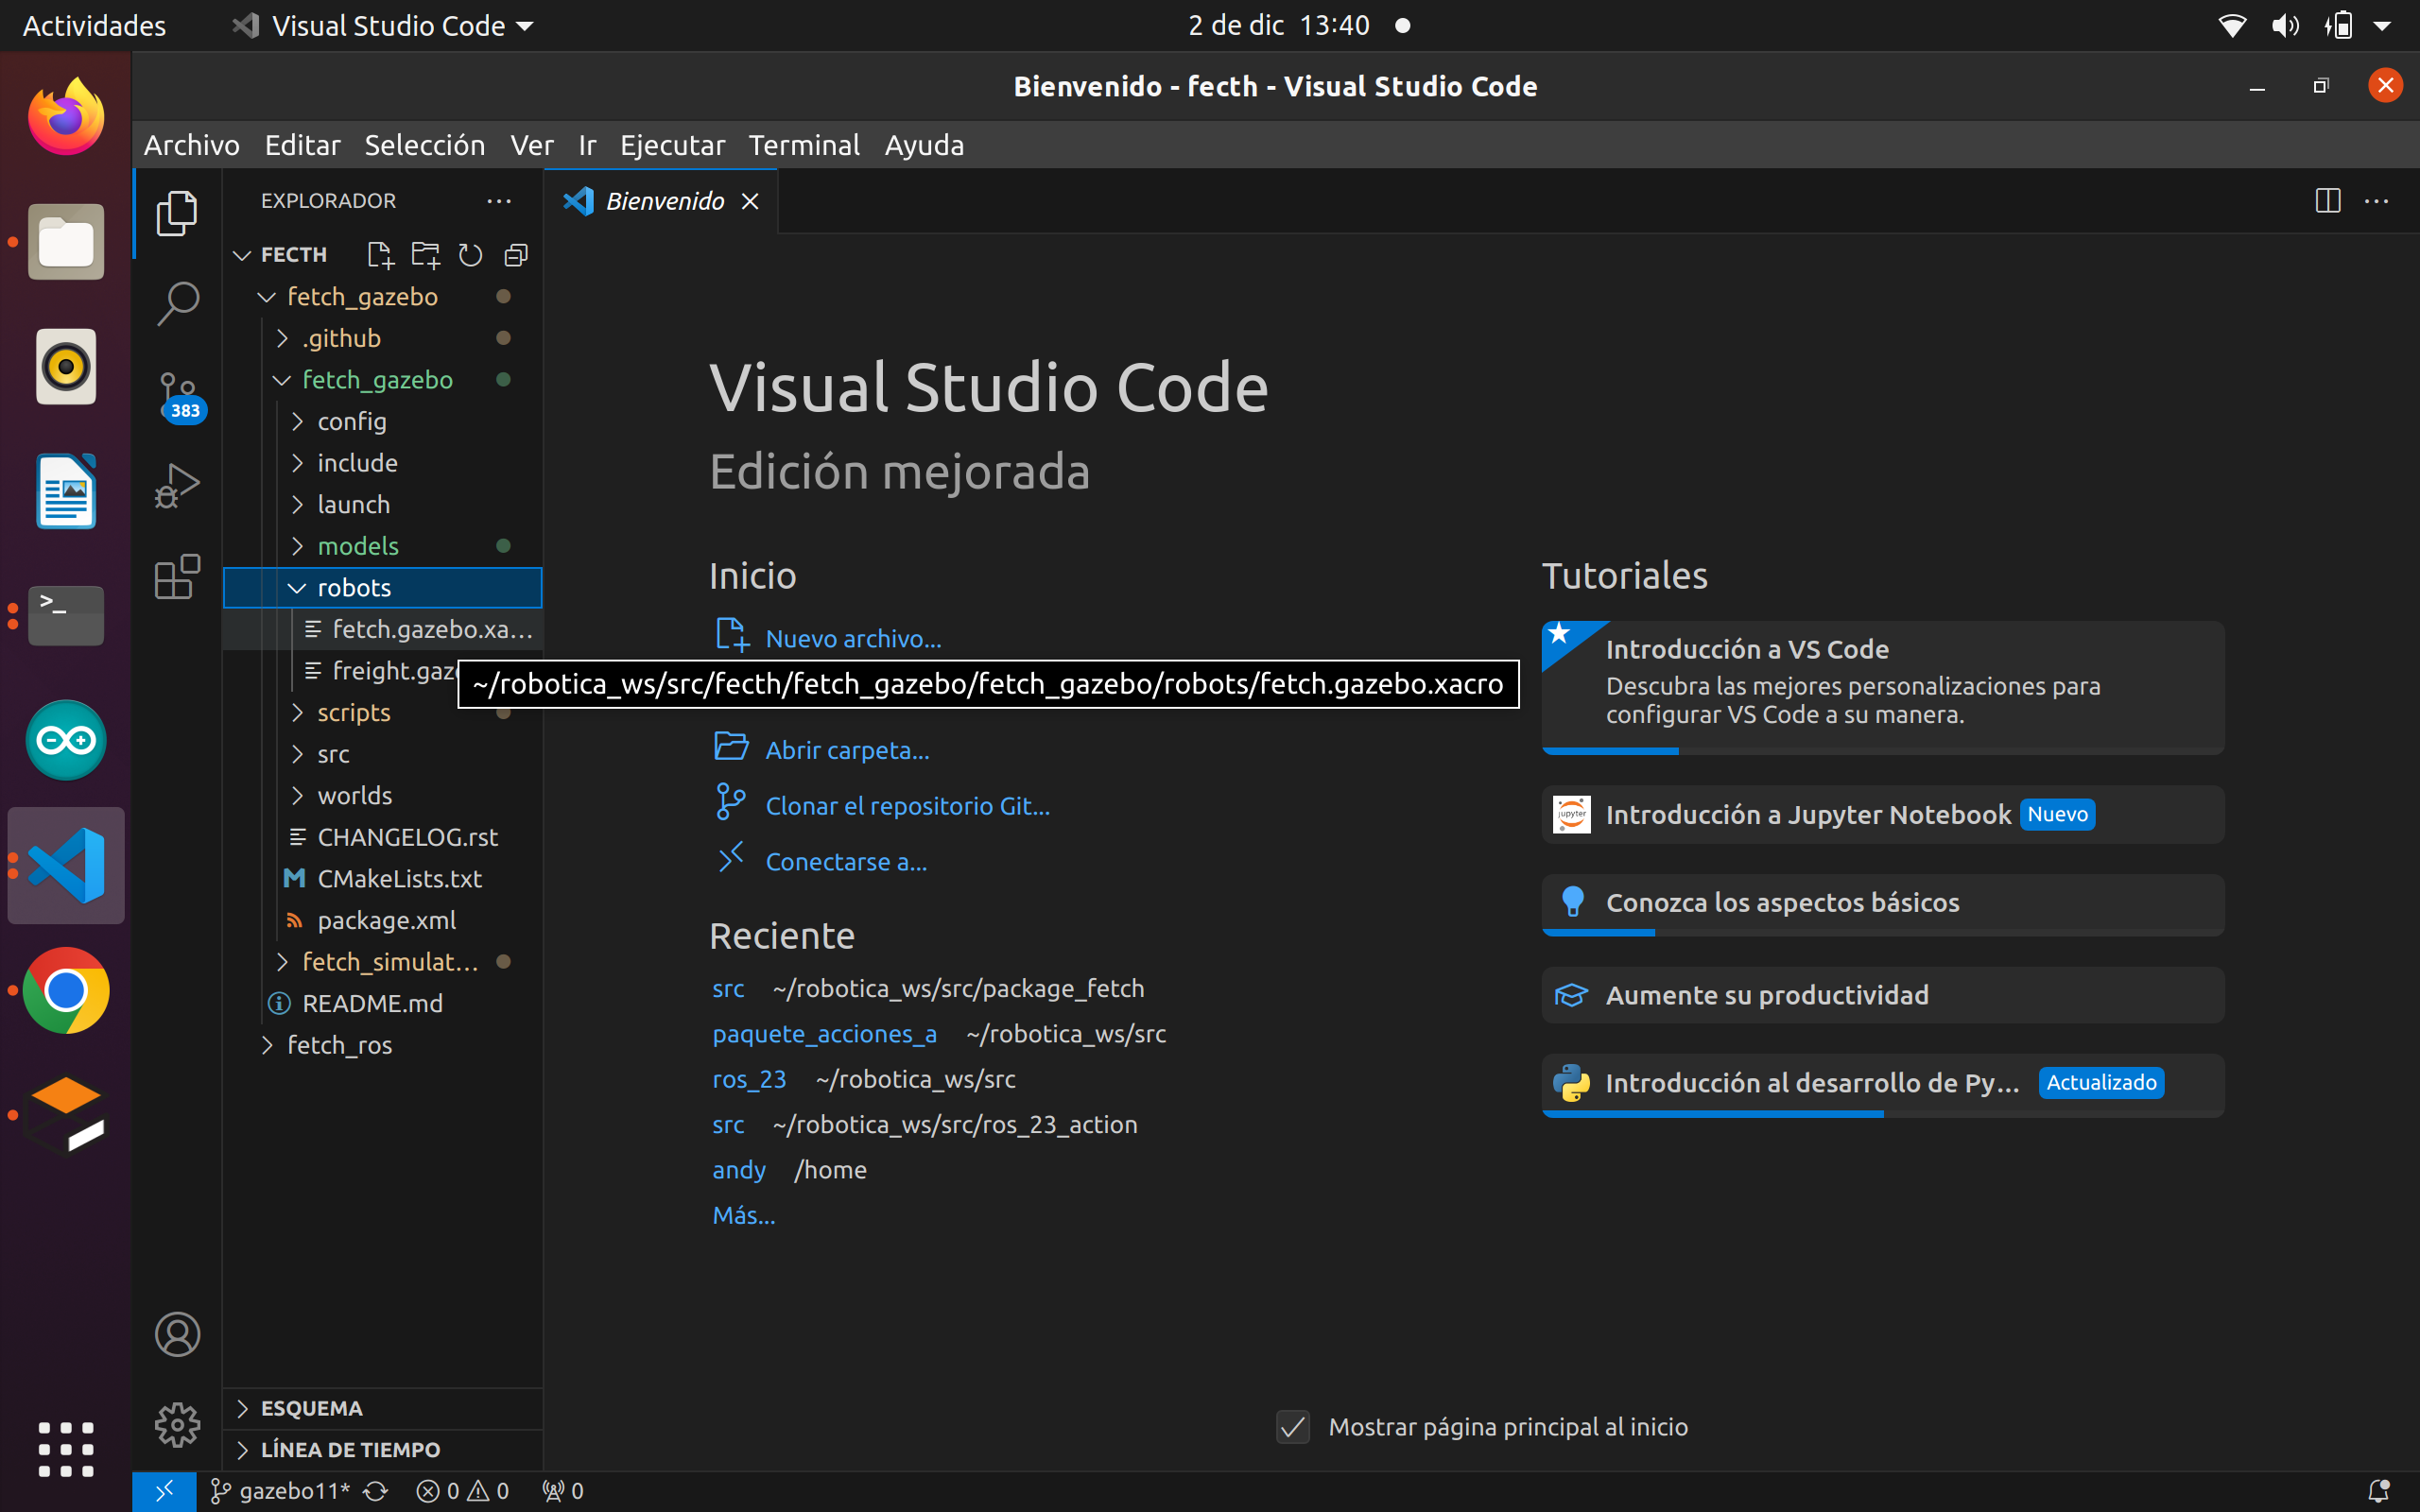

Buscamos los parametros relacionados a base_laser

modificamos los siguientes parametros:

Original:
```
  <gazebo reference="laser_link">
    <sensor type="ray" name="base_laser">
      <pose>0 0 0 0 0 0</pose>
      <visualize>false</visualize>
      <update_rate>15</update_rate>
      <ray>
        <scan>
          <horizontal>
            <samples>662</samples>
            <resolution>1</resolution>
            <min_angle>-1.91986</min_angle>
            <max_angle>1.91986</max_angle>
          </horizontal>
        </scan>
        <range>
          <min>0.05</min>
          <max>25.0</max>
          <resolution>0.01</resolution>
        </range>
        <noise>
          <!-- Noise parameters based on spec for SICK TIM561 (10m version) -->
          <type>gaussian</type>
          <mean>0.0</mean>
          <stddev>0.02</stddev>
        </noise>
      </ray>
      <plugin name="gazebo_ros_base_hokuyo_controller" filename="libgazebo_ros_laser.so">
        <topicName>/base_scan</topicName>
        <frameName>laser_link</frameName>
      </plugin>
    </sensor>
  </gazebo>
```
Cambios


```
  <!-- SICK TIM561 (25m Range) -->
  <gazebo reference="laser_link">
    <sensor type="ray" name="base_laser">
      <pose>0 0 0 0 0 0</pose>
      <visualize>true</visualize>
      <update_rate>15</update_rate>
      <ray>
        <scan>
          <horizontal>
            <samples>240</samples>
            <resolution>1</resolution>
            <min_angle>-1.91986</min_angle>
            <max_angle>1.91986</max_angle>
          </horizontal>
        </scan>
        <range>
          <min>0.05</min>
          <max>1.5</max>
          <resolution>0.01</resolution>
        </range>
        <noise>
          <!-- Noise parameters based on spec for SICK TIM561 (10m version) -->
          <type>gaussian</type>
          <mean>0.0</mean>
          <stddev>0.02</stddev>
        </noise>
      </ray>
      <plugin name="gazebo_ros_base_hokuyo_controller" filename="libgazebo_ros_laser.so">
        <topicName>/base_scan</topicName>
        <frameName>laser_link</frameName>
      </plugin>
    </sensor>
  </gazebo>
```




revisamos los topicos existentes

revisamos la informacion del topico base_scan


```
rostopic info /base_scan
```

revisamos la estructura del mensaje


```
rosmsg info sensor_msgs/LaserScan
```

las muestras del laser se almacenan en el tipo de dato float32[] ranges





#Ejecucion de un escenario

`roslaunch fetch_gazebo playground.launch`

para escuchar una sola vez

`rostopic echo /base_scan -n1`

Visualización de la camara

```
#!/usr/bin/env python3                         
# encoding: utf-8

import rospy                                  
from geometry_msgs.msg import Twist           #Importamos el tipo de mensaje Twist                                                          
import math

global wref, uref, tetha

def calcular():
    global wref, uref, tetha
    uref =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    wref =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              -1, -1, -1,-1, -1, -1, -1, -1, -1,-1, -1, -1, -1, -1, -1,-1, -1, -1, -1, -1, -1,-1, -1, -1]
    tetha = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

def nodo():                                   #Definimos una función nodo                                   
    
    rospy.init_node('nodo_movimiento_base')         #Inicializamos nuestro nodo y le asignamos un nombre = nodo_movimiento_base
           
                                                # Name Topic   |tipo de mensaje|límite de 10 mensajes en cola
    velocity_publisher = rospy.Publisher('/base_controller/command',Twist, queue_size=10)

    # creamos un arreglo de mensajes tipo Twist (Para generar una trayectoria)
    vel_robot = []

    vel_referencia_x = []
    vel_referencia_y = []
    vel_referencia_w = []
    for i in range(len(uref)):
        x = uref[i]*math.cos(tetha[i])
        y = uref[i]*math.sin(tetha[i])
        w = wref[i]
        vel_referencia_x.append(x)
        vel_referencia_y.append(y)
        vel_referencia_w.append(w)

    print("Cantidad de datos", len(vel_referencia_x))
    for i in range(len(vel_referencia_x)):
        vel_msg = Twist()
        vel_msg.linear.x = vel_referencia_x[i]   #Asignamos una velocidad lineal a la componenete en X
        vel_msg.linear.y = vel_referencia_y[i]    #Asignamos una velocidad lineal a la componenete en Y
        vel_msg.angular.z = vel_referencia_w[i]   #Asignamos una velocidad angular en Z
        vel_robot.append(vel_msg)

    rate = rospy.Rate(10)     #Crea un objeto Rate a 10hz
    i = 0
    while not rospy.is_shutdown():              #Bucle While
        if(i > len(vel_referencia_x)-1):
             break
        print("Velocidad: ", i)
        velocity_publisher.publish(vel_robot[i])     #publicamos nuestro mensaje vel_robot para mover la base del robot                                                
        i = i+1
        rate.sleep()                            #Loop 10 times per second           

if __name__ == '__main__':                                  
    try:
        calcular()
        nodo()                                 # Lamamos a la función nodo
    except rospy.ROSInterruptException :       # Check si hay una excepción  Ctrl-C para terminar la ejecución del nodo
            pass
```

